## Load Packages

In [2]:
import numpy as np
import tellurium as te
import matplotlib.pyplot as plt
import ipywidgets as widgets # for the widgets
from IPython.display import display # to display them

## Context for the Notebook

This notebook is meant to provide an introduction to Dynamical Systems Theory (DST) and apply the basic tenets to equilibrium points in chemical systems. First, background to DST will be provided along with a series of Intuition Checks for user understanding. Then, the notebook will describe dynamics in one and two dimensions, followed by a guided and an unguided example. Lastly, further resources and other conclusions will be provided.

## Section 1: What is a Dynamical System?

In general, a dynamical system is best defined as any system that changes in time. These systems can be deterministic, stochastic, spatial, aspatial, discrete, or continuous. Since we are relying on mass-action kinetics, this introduction will be focused on deterministic, continuous systems.

It is sometimes possible to solve a system of ordinary differential equations (ODEs) analytically in closed form (pen and paper work fine), but this is often not the case for sufficiently nonlinear systems, and most phenomena in nature fall into this difficult category! Not only that, but even within the cases where it is possible to solve nonnumerically, sometimes things can get unwieldy very quickly. For that reason, this quick-and-dirty introduction will emphasize how to begin dealing with dynamical systems numerically.

### Systems of Ordinary Differential Equations (ODEs)

In order to understand a system of ODEs, it is important to first understand the structure of an ODE in general. An ODE describes the time-evolution of a state-variable (purple) a moving part in the dynamical system. The parts of the equation that remain fixed are called parameters (orange). Sometimes the initial state of the system is also called a parameter, although this terminology is less universal. An ODE's right hand side, the function that governs it, can take any number of parameters and can also take each state-variable of the system as an input, or no state at all.

$$
\frac{𝑑𝑆}{𝑑𝑡}=𝑆(0.3) 
$$

A dynamical system is comprised of a system of one or more ODEs with no upper bound. Each state-variable of the system has its own governing ODE, and the number of ODEs there are is used to define the dimensionality of the system.For example, consider the following set of equations with the same color scheme as above:

$$
\frac{𝑑𝑆1}{𝑑𝑡}=𝑆1(𝑃1) \\

\frac{𝑑𝑆2}{𝑑𝑡}=𝑆2(𝑃2)−𝑆1(𝑃3) 
$$

Here we have a two-dimensional dynamical system with three parameters. The state of the system is a represented by the states of all of its state-variables. In principle, there is no upper bound on the dimensionality of systems we can model. For example, imagine that we wanted to make a model of the human brain at the level of individual cells. Just accounting for neurons (note that other cells, such as glia, also play important roles) this gives a lower bound for a ~100-billion-dimensional dynamical system! There is also the question of how biophysically realistic we want the neurons to be. If we are hoping to use neural components that have spiking behavior, this often assumes that each neuron on its own is governed by at least two ODEs. Note that, as modelers, our job is not to reproduce the exact thing we are trying to understand, but to capture some essence of it that offers new insights.

### Intuition Check!
For the following systems, how many dimensions would my ODE model be?

1. I want to understand how the human population grows and shrinks over time. For simplicity, I only consider rates of birth and death.

In [9]:
@widgets.interact(selection = widgets.Dropdown(options=['','1','2','3+']))

def I_check_1(selection):
    if selection == '1':
        print("Correct! In this case, the one state variable is the human population, while birth and death rates are parameters.")
    elif selection == '':
        print('')
    else:
        print("Incorrect, try again.")

interactive(children=(Dropdown(description='selection', options=('', '1', '2', '3+'), value=''), Output()), _d…

2. I want to model how the populations of deer and wolves interact over time.

In [10]:
@widgets.interact(selection = widgets.Dropdown(options=['','1','2','3+']))

def I_check_2(selection):
    if selection == '2':
        print("Correct! In this case, the two state variables are the populations of deer and wolves.")
    elif selection == '':
        print('')
    else:
        print("Incorrect, try again.")

interactive(children=(Dropdown(description='selection', options=('', '1', '2', '3+'), value=''), Output()), _d…

### Visualizing Dynamical Systems

In general, we can talk about a dynamical system in terms of time series and state-space. When we are looking at a time series, the x-axis is for time, and the y-axis is for the value of the state variables. In this case, each state variable has its own line. Taking a two dimensional system:

$$
\frac{𝑑𝑆1}{𝑑𝑡}=𝑓(...) \\
$$

$$
\frac{𝑑𝑆2}{𝑑𝑡}=𝑓(...)
$$

We might get something like the following time-series:

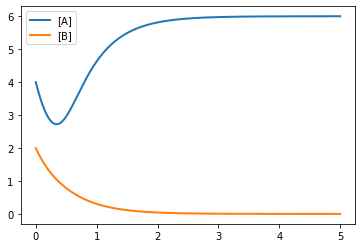

In [19]:
r = te.loada('''
    J1: -> A; k1/(1+B^n1) - k2*A;
    J2: -> B; k3/(1+A^n2) - k4*B;
    A = 4; B = 2;
    k1 = 12; k3 = 12; k2 = 2; k4 = 2
    n1 = 4; n2 = 4
''')
m = r.simulate(0,5,500)
r.plot(m)



As we can see, the dynamics of A and B play out and reach a fixed point relative to one another over time. Is there a way we can fit both trajectories in a more holistic picture?

The state-space of a dynamical system can provide such a picture. Instead of plotting our state variables with respect to time, we could plot how the states change as time passes. The same initial conditions above would look like this in state space:

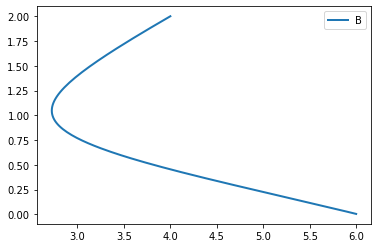

In [40]:
r.reset()
m = r.simulate(0,5,500,['A','B'])
r.plot()

So, beginning at the point (4,2), the system first dips in A before rising to 6, while B continuously decreases to 0. This is a **trajectory** in the state space of the system. These trajectories visualize the dynamics of our state variables and in turn the behavior of our system. 

### What do Trajectories look like in DST?

In general, there are two ground rules we have to keep in mind when talking about the time-evolution of a deterministic and continuous dynamical system:

**Existence and Uniqueness Theorem**: For any initial value of the state-variables, there is a unique solution. This means trajectories cannot cross and a given value will always result in the same trajectory.

**Smoothness of the Trajectory**: Trajectories in an ODE model work within a continuous state-space, and therefore should not show the jagged lines characteristic of discrete jumps.

So, in general, we should not expect any sharp corners or crossing lines. That being said, trajectories may leave the state space (given that they may move the value of the state variables beyond the region we are examining) and they may stop (which will be especially important as we move to fixed points!). 

### Intuition Check!
Which of the following systems follow the rules described above?


From here, we have the building blocks to describe dynamics in one and two dimensions.

## Section 2: Dynamics in One Dimension

When we formalize dynamical systems, the number of dimensions of the system corresponds to the number of state variables in that system, and in turn the number of ODEs we need to define to describe the change of those state variables. So, in a one-dimensional case, we need one ODE. Consider the following equation that describes the change in state variable A over time:

$$
\frac{𝑑A}{𝑑𝑡}= -A^3 + 5A 
$$

How does the behavior of this system unfold over time? As a first pass, we can examine time series for different initial values of A:

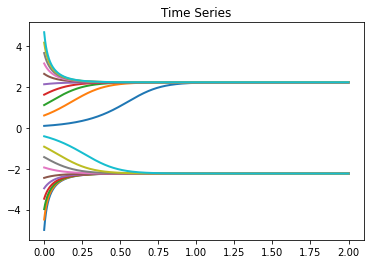

In [53]:
rr = te.loada ('''
    J1: ->A ; -A^3+ d*A
    d=5;
    Perturb=0
    Pert_time=50
    at (time>Pert_time): A=A+Perturb
    at (A<0): A=0.01
''')
for A0 in np.arange(-5,5,0.51):
    rr.resetAll()
    rr.A=A0
    m = rr.simulate(0, 2, 1000)
    p = te.plotArray(m, show=False, title="Time Series", resetColorCycle=False)
plt.show()

It appears that after a short time the system converges on one of two values of A around 2 and -2. In other words, at these points the state of A is **no longer changing**, which indicates something special about this point in our system. 

Points in dynamic systems where there are no more dynamics, where the state no longer changes over time, are known as **equilibrium points**. A simple way to solve for this analytically would be to take our equation from before, set it equal to zero (to where it is not changing), and solve for what values of A this is true:

$$
-A^3 + 5A = 0 \\
-A * (A^2 - 5) = 0 \\
Solutions: A = 0, \ A = \sqrt{5}, \ A = -\sqrt{5}
$$

The algebra has given us three solutions, but it seems that there are only two outcomes from our time series. How can this be? 

This is because equilibrium points have different **stabilities**. **Stable equilibrium points** are those where initial conditions adjacent to that point return to that point while **unstable equilibrium points** are those where the same initial conditions lead the trajectory to move away from the point. 

Formally, we can solve for the stability of the solutions we found above by assessing the slope of the function in the neighborhood of (close to) the equilibrium point. To this end, let us consider the **Taylor Expansion**. Near a given point, any smooth function can be represented as:

$$
f(x) \approx f(x_0) + f'(x_0)(x-x_0) + \frac{f''(x_0)(x-x_0)^2}{2!} + ...
$$

This **Taylor Series** is an infinite sum of terms of any functions derivatives at a single point. It basically allows us to linearize around a certain equilibrium point to determine its stability. First, because the first term of the series is the point we are already on, we can remove the first term and reduce the series to:

$$
f(x) \approx f'(x_0)(x-x_0) + \frac{f''(x_0)(x-x_0)^2}{2!} + ...
$$

For the sake of stability analysis, we can collapse this infinite series into its first term:

$$
f(x) \approx f'(x_0)(x-x_0)
$$ 

This approximation is equivalent to the slope of the function at equilibrium, the sign of which provides us with stability information. If $f'(x_0) < 0$, the perturbation will eventually decay to 0, leaving us with no long-term difference between the equilibrium point and the perturbed point. As previously described, this implies a stable equilibrium point. Conversely, if $f'(x_0) > 0$, the perturbation will grow exponentially, implying an unstable equilibrium point. The magnitude of $f'(x_0)$ in either case tells us how quickly that return to or departure from the equilibrium point will occur. 

Importantly, only stable equilibrium points are observable in real systems, as for an unstable equilibrium point to be observed, the system must start at that state and never be perturbed from it. This is why we only see two outcomes in the time series. However, if we *reverse time* by swapping the sign of our ODE, we can use our time series to examine unstable equilibria in the same way we used forward time to see the stable equilibria:

In [13]:
rr = te.loada ('''
    J1: ->A ; A^3 - d*A
    d=5;
    Perturb=0
    Pert_time=50
    at (time>Pert_time): A=A+Perturb
    at (A<0): A=0.01
''')
for A0 in np.arange(-5,5,0.5):
    rr.resetAll()
    rr.A=A0
    m = rr.simulate(0, 2, 1000)
    p = te.plotArray(m, show=False, title="Time Series", resetColorCycle=False)
plt.show()

RuntimeError: CVODE Error: CV_CONV_FAILURE: Convergence test failures occurred too many times (= MXNCF = 10) during one internal timestep or occurred with |h| = hmin.; In virtual double rr::CVODEIntegrator::integrate(double, double)

There is one other possible outcome of our stability analysis, namely when $f'(x_0) = 0$. In this case, the equilibrium point is considered **non-hyperbolic**. In these special cases, the entire dynamical system is going through a characteristic change that will dramatically augment the behavior of trajectories within that system. This kind of change is known as a **bifurcation**. 

Bifurcations occur within **families** of dynamical systems, those that take a similar form with different specific parameter values. Take for example:

$$
\frac{𝑑A}{𝑑𝑡}= -A^3 + 5A + c
$$

where *c* is a parameter that is fixed within a single dynamical system but that changes throughout the family of that system. Let's look at time series for two different values of *c*. 

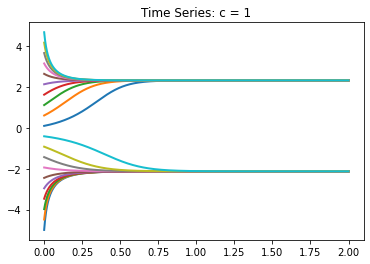

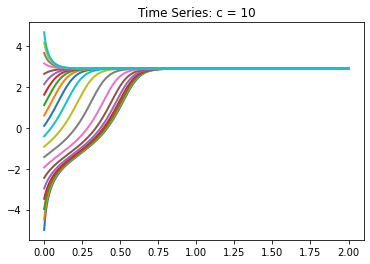

In [19]:
r = te.loada ('''
    J1: ->A ; -A^3+ d*A + c
    d=5;
    c=1;
    Perturb=0
    Pert_time=50
    at (time>Pert_time): A=A+Perturb
    at (A<0): A=0.01
''')
for A0 in np.arange(-5,5,0.51):
    r.resetAll()
    r.A=A0
    m = r.simulate(0, 2, 1000)
    p = te.plotArray(m, show=False, title="Time Series: c = 1", resetColorCycle=False)
plt.show()

for A0 in np.arange(-5,5,0.51):
    r.resetAll()
    r.A=A0
    r.c=10
    m = r.simulate(0, 2, 1000)
    p = te.plotArray(m, show=False, title="Time Series: c = 10", resetColorCycle=False)
plt.show()


By changing *c*, all of a sudden we only have one observed outcome in the system! This is because the system has undergone a bifurcation in which the unstable equilibrium point and one of the stable equilibrium points have collided and dissappeared. We can better visualize this change by examining a **bifurcation diagram**, which displays the equilibrium values as we vary the parameter *c*:

In [ ]:
## INSERT BIFURCATION DIAGRAM

As we move along the *c* axis, we can see the birth of two equilibria in a **fold bifurcation** followed by the elimination of two equilibria in a second fold bifurcation.

Now that we have built intuitions about equilibrium points, their stability, and bifurcations, we will move to two dimensions to visually and analytically examine other features of dynamical systems and how the interaction of two state variables play out.

## Section 3: Dynamics in Two Dimensions

This time, let's consider a system of two equations:

$$
\frac{𝑑A}{𝑑𝑡}= -A^3 + \frac{A}{2} + B
$$

$$
\frac{𝑑B}{𝑑𝑡}= -B^3 + \frac{B}{2} + A 
$$